<font size=5> Predicting Customer Churn </font>

In [62]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, KFold
import joblib
import matplotlib.pyplot as plt

In [63]:
churn=pd.read_csv('churn_clean.csv')

In [64]:
churn.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [65]:
churn.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

<font size="4"> Data Preprocessing </font>


In [66]:
#Drop columns irrelavant to analysis
churn.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 
            'City', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job', 'Gender', 
            'Email', 'Techie', 'PaymentMethod', 'Item1', 'Item2', 'Item3',
            'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1, inplace=True)

In [67]:
churn.columns

Index(['State', 'Population', 'Children', 'Age', 'Income', 'Marital', 'Churn',
       'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [68]:
churn.isna().sum()

State                   0
Population              0
Children                0
Age                     0
Income                  0
Marital                 0
Churn                   0
Outage_sec_perweek      0
Contacts                0
Yearly_equip_failure    0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

In [72]:
print(churn.dtypes)

State                    object
Population                int64
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Churn                    object
Outage_sec_perweek      float64
Contacts                  int64
Yearly_equip_failure      int64
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
PaperlessBilling         object
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: object


Categorical Encoding

In [73]:
churn= pd.get_dummies(churn, columns=['State','Marital','Contract','Port_modem','Tablet','InternetService', 'Phone','Multiple',
                                      'OnlineSecurity','OnlineBackup' ,'DeviceProtection','TechSupport', 'StreamingTV', 
                                      'StreamingMovies', 'PaperlessBilling'],drop_first=True)

In [74]:
churn.dtypes

Population                int64
Children                  int64
Age                       int64
Income                  float64
Churn                    object
                         ...   
DeviceProtection_Yes      uint8
TechSupport_Yes           uint8
StreamingTV_Yes           uint8
StreamingMovies_Yes       uint8
PaperlessBilling_Yes      uint8
Length: 81, dtype: object

In [75]:
bool_cols = churn.select_dtypes(include='bool').columns
churn[bool_cols] = churn[bool_cols].astype(int)
churn.dtypes

Population                int64
Children                  int64
Age                       int64
Income                  float64
Churn                    object
                         ...   
DeviceProtection_Yes      uint8
TechSupport_Yes           uint8
StreamingTV_Yes           uint8
StreamingMovies_Yes       uint8
PaperlessBilling_Yes      uint8
Length: 81, dtype: object

Evaluate For Multicollinearity

In [76]:
VIF=churn.drop(['Churn'], axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = VIF.columns
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i) for i in range(VIF.shape[1])]
vif_data=vif_data.sort_values('VIF', ascending=False)

In [77]:
print(vif_data.head(5))

                        feature           VIF
9             Bandwidth_GB_Year  10114.303145
7                        Tenure   7898.345366
8                 MonthlyCharge    627.212311
69  InternetService_Fiber Optic     71.205778
2                           Age     27.256798


In [78]:
churn.drop(['Bandwidth_GB_Year', 'Tenure', 'MonthlyCharge', 'InternetService_Fiber Optic', 'Age'], axis=1, inplace=True)

In [79]:
VIF2= churn.drop(['Churn'], axis=1)

vif_data2 = pd.DataFrame()
vif_data2["feature"] = VIF2.columns
vif_data2["VIF"] = [variance_inflation_factor(VIF2.values, i) for i in range(VIF2.shape[1])]
vif_data2=vif_data2.sort_values('VIF', ascending=False)

In [80]:
print(vif_data2.head(5))

               feature        VIF
3   Outage_sec_perweek  11.502765
66           Phone_Yes  10.170639
2               Income   2.975032
49            State_TX   2.875416
39            State_NY   2.709061


In [81]:
churn.drop(['Phone_Yes', 'Outage_sec_perweek'], axis=1, inplace=True)

In [82]:
VIF3= churn.drop(['Churn'], axis=1)

vif_data3 = pd.DataFrame()
vif_data3["feature"] = VIF3.columns
vif_data3["VIF"] = [variance_inflation_factor(VIF3.values, i) for i in range(VIF3.shape[1])]
vif_data3=vif_data3.sort_values('VIF', ascending=False)

In [83]:
print(vif_data3.head(5))

                 feature       VIF
2                 Income  2.971568
72  PaperlessBilling_Yes  2.417037
3               Contacts  2.015516
48              State_TX  2.002513
70       StreamingTV_Yes  1.968232


Cleaned Dataset

In [84]:
#churn.to_csv('Churn_D4.csv', index=False)

<font size='4'> Data Analysis </font>

Splitting the Data: 60% training, 20% testing, 20% validation

In [85]:
y=churn['Churn']
X=churn.drop('Churn', axis=1)
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4, random_state=13)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=13)


In [86]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(6000, 73)
(2000, 73)
(2000, 73)


Initial Model Creation

In [89]:
#Instantiate Model
rf = RandomForestClassifier(random_state=13)
#Fit Model
rf.fit(X_train, y_train)
#Predict
y_pred=rf.predict(X_test)

#Accuracy Metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("=== Accuracy ===")
print(f"{accuracy:.4f}")
y_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_auc= round(roc_auc_score(y_test, y_pred_proba), 4)
print("=== ROC AUC Score ===")
print(roc_auc)


=== Classification Report ===
              precision    recall  f1-score   support

          No       0.79      0.95      0.86      1459
         Yes       0.70      0.31      0.43       541

    accuracy                           0.78      2000
   macro avg       0.74      0.63      0.64      2000
weighted avg       0.76      0.78      0.74      2000

=== Confusion Matrix ===
[[1387   72]
 [ 375  166]]
=== Accuracy ===
0.7765
=== ROC AUC Score ===
0.7955


Feature Importance: remove insignificant variables

In [90]:
importances=rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

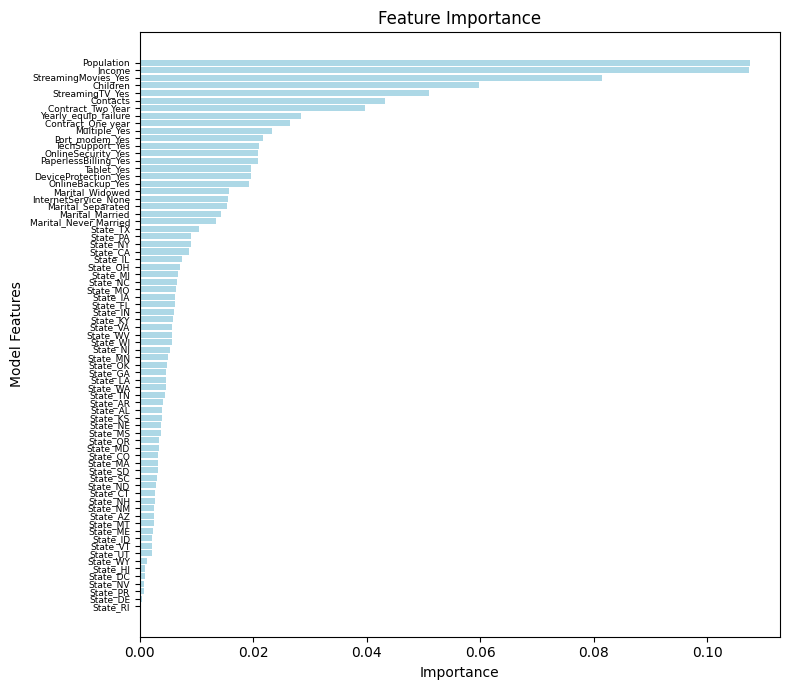

In [91]:
plt.figure(figsize=(8, 7))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.ylabel('Model Features')
plt.yticks(fontsize=6.5)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [92]:
low_importance=importance_df[importance_df['Importance'] < 0.01 ]
low_importance

,Feature,Importance
44,State_RI,0.000257
12,State_DE,0.000467
43,State_PR,0.000799
37,State_NV,0.000818
11,State_DC,0.000841
15,State_HI,0.000909
55,State_WY,0.001318
49,State_UT,0.002101
51,State_VT,0.002105
17,State_ID,0.002123


In [93]:
features_to_drop = [col for col in churn.columns if 'State_' in col]
churn.drop(columns=features_to_drop, inplace=True)
churn.shape

(10000, 23)

Re-define train/test/val sets

In [94]:
y=churn['Churn']
X=churn.drop('Churn', axis=1)
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4, random_state=13)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=13)

In [95]:
#Confirm Changes
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(6000, 22)
(2000, 22)
(2000, 22)


Hyperparameter Tuning

In [96]:
#Define Hypyerparameters
n_estimators = [100, 200, 500, 1000]
max_depth = [10, 20, 30, 40, 50, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2,]
bootstrap = [True, False]

#Create hyperparameter grid for randomized search
param_grid = {'n_estimators': n_estimators,  
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap
              }

param_grid

{'n_estimators': [100, 200, 500, 1000],
 'max_depth': [10, 20, 30, 40, 50, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2],
 'bootstrap': [True, False]}

In [97]:
#Instantiate Kfold cross validation
kf=KFold(n_splits=5, shuffle=True, random_state=13)

In [98]:
#Randomzied Search
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=kf, random_state=13, verbose=2, n_jobs=-1)

#Fit the randomized search model with training data
rf_random.fit(X_val, y_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total t

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=13, shuffle=True),
                   estimator=RandomForestClassifier(random_state=13),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000]},
                   random_state=13, verbose=2)

In [99]:
#Obtain the best model
best_model=rf_random.best_estimator_

#Hyperparameters
best_params=rf_random.best_params_
best_params

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'bootstrap': True}

In [100]:
#Save rf_random
#joblib.dump(rf_random, 'random_forest_model.pkl')

#load:
#rf_random = joblib.load('random_forest_model.pkl')

<font size="4"> Predictions </font>

In [101]:
#Predict on test set
y_test_pred= best_model.predict(X_test)

#Evaluate Accuracy
print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_test_pred)
print("=== Accuracy ===")
print(f"{accuracy:.4f}")
y_pred_proba5 = best_model.predict_proba(X_test)[:, 1]
roc_auc= round(roc_auc_score(y_test, y_pred_proba5), 4)
print("=== ROC AUC Score ===")
print(roc_auc)

=== Classification Report ===
              precision    recall  f1-score   support

          No       0.79      0.95      0.86      1459
         Yes       0.71      0.30      0.42       541

    accuracy                           0.78      2000
   macro avg       0.75      0.63      0.64      2000
weighted avg       0.77      0.78      0.74      2000

=== Confusion Matrix ===
[[1393   66]
 [ 379  162]]
=== Accuracy ===
0.7775
=== ROC AUC Score ===
0.8085


Most Important Features

In [102]:
importances=best_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(5)

,Feature,Importance
2,Income,0.135769
20,StreamingMovies_Yes,0.134101
0,Population,0.133738
19,StreamingTV_Yes,0.100638
1,Children,0.063967


<font size=4> Findings </font>

The model predicts with 77.75% accuracy

95% of customers who stayed with the telecom company were predicted to stay.

<font size='4'> Significance </font>

This analysis provides actionable insights for the telecommunications company to optimize its retention efforts. The model effectively identifies non-churning customers with high precision, enabling the company to save resources by focusing retention strategies only on those at risk of leaving. 

The company can implement targeted interventions such as discounts, outreach, and feedback collection for customers predicted to churn. By adjusting the churn threshold and gathering more data, the model can be further refined, ultimately helping the company allocate resources more efficiently and improve customer retention.”